In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.set_index('CustomerID')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

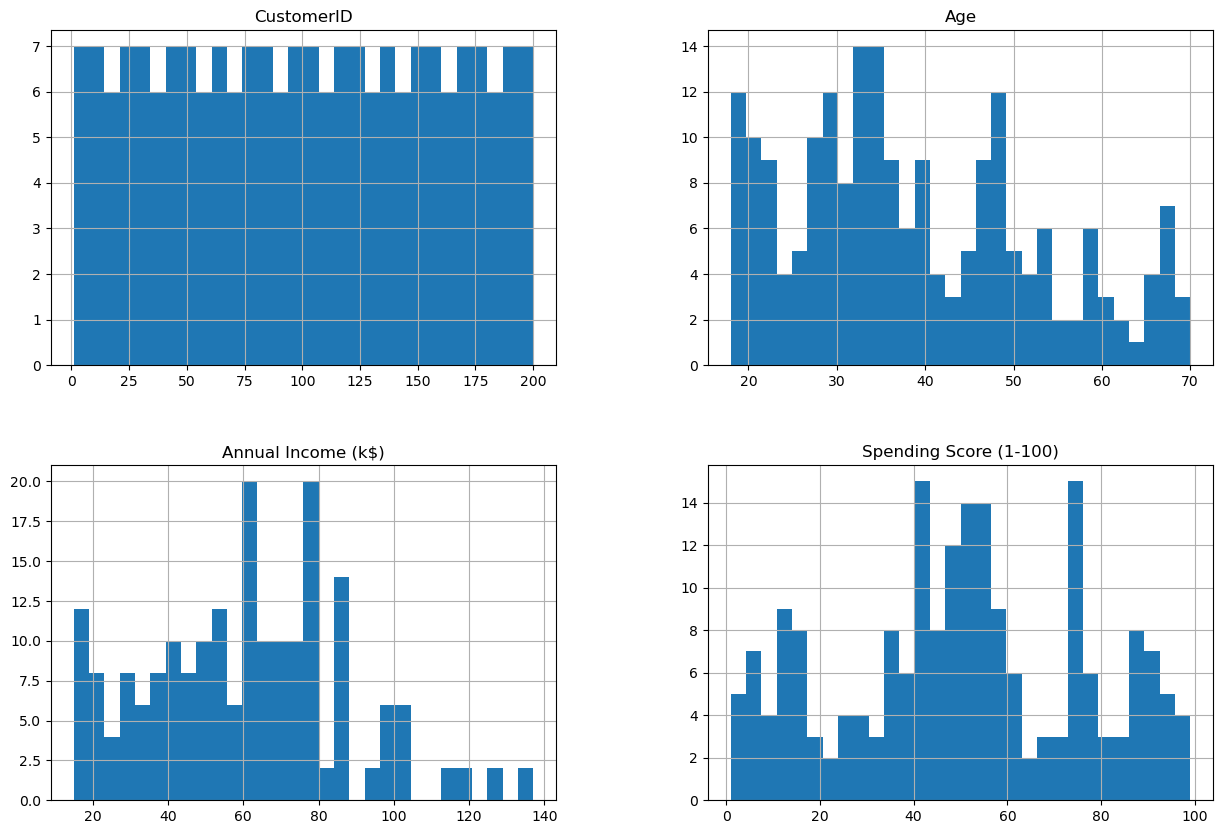

In [11]:
df.hist(bins=30, figsize=(15, 10))

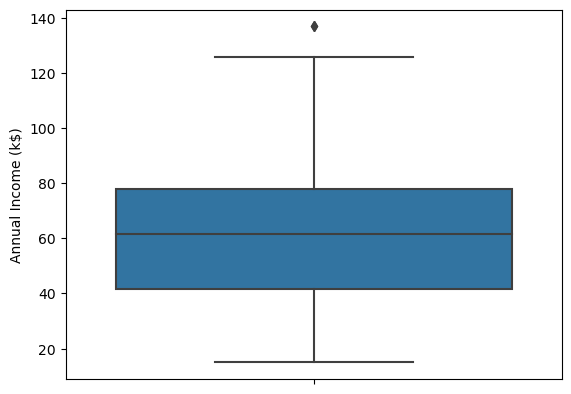

In [32]:
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

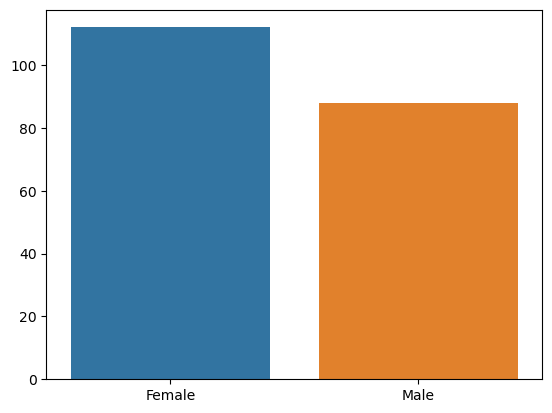

In [35]:
count = df['Gender'].value_counts()
sns.barplot(x=count.index, y=count.values)
plt.show()

Now we will strat to see the relationship between every feautre

<Axes: xlabel='Age'>

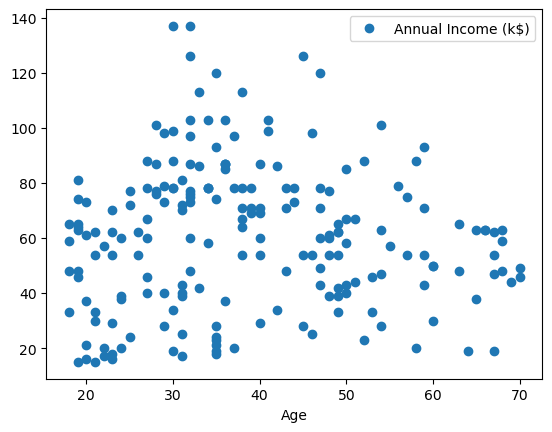

In [20]:
df.plot(x='Age', y='Annual Income (k$)', style='o')

<Axes: xlabel='Age'>

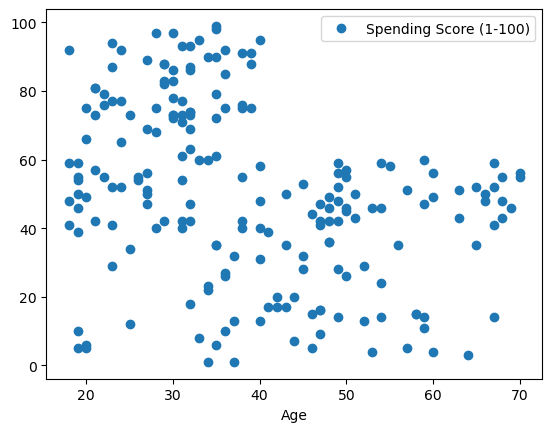

In [22]:
df.plot(x='Age', y='Spending Score (1-100)', style='o')

<Axes: xlabel='Annual Income (k$)'>

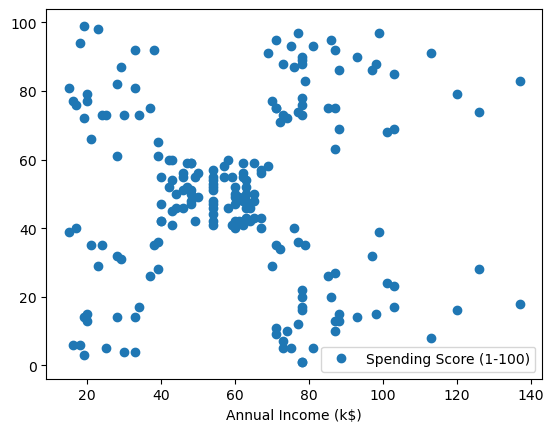

In [23]:
df.plot(x='Annual Income (k$)', y='Spending Score (1-100)', style='o')

C:\Users\theki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\theki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\theki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\theki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

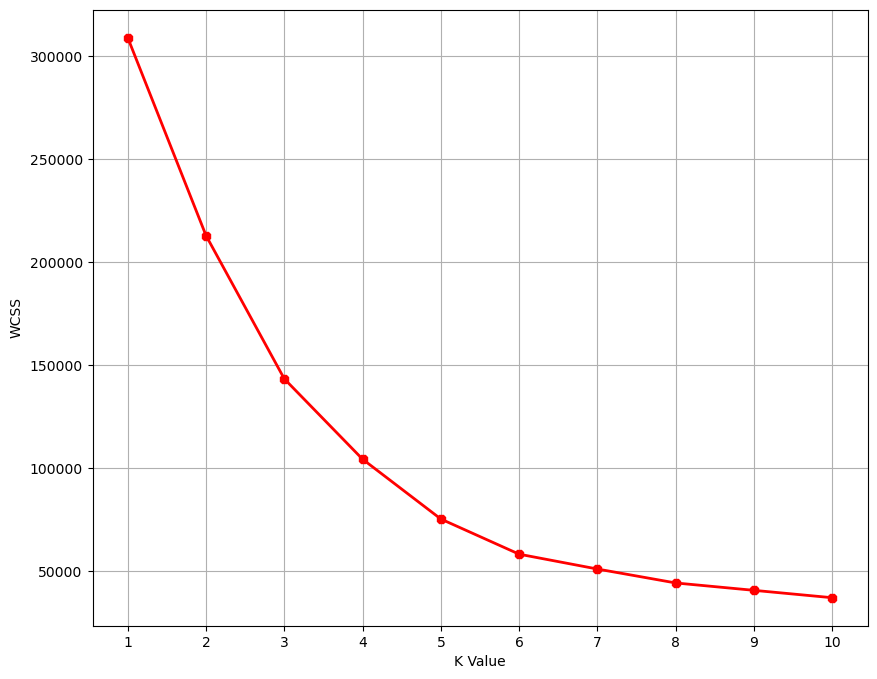

In [62]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,2:])
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10,8))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [41]:
kmmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y= kmmodel.fit_predict(X)
print(y)

C:\Users\theki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\theki\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[0 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 4 0 4 1 4 1 3 1 3 1 4 0 4 1 3 1 3 1 3 1 3
 1 3 1 2 1 4 0 4 0 2 0 0 0 2 0 0 2 4 4 2 2 0 2 2 0 2 2 2 0 4 2 0 0 2 4 2 2
 2 0 4 4 0 4 2 0 2 4 0 4 2 0 0 4 2 0 4 4 0 0 4 0 4 0 0 4 2 0 2 0 2 2 2 2 2
 0 4 0 0 0 2 2 4 2 0 4 0 1 0 1 4 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 4 1
 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4 1 3 1 4 0 3 1 3 1 3 1 3 1 3 1 4 1 3 1 4
 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


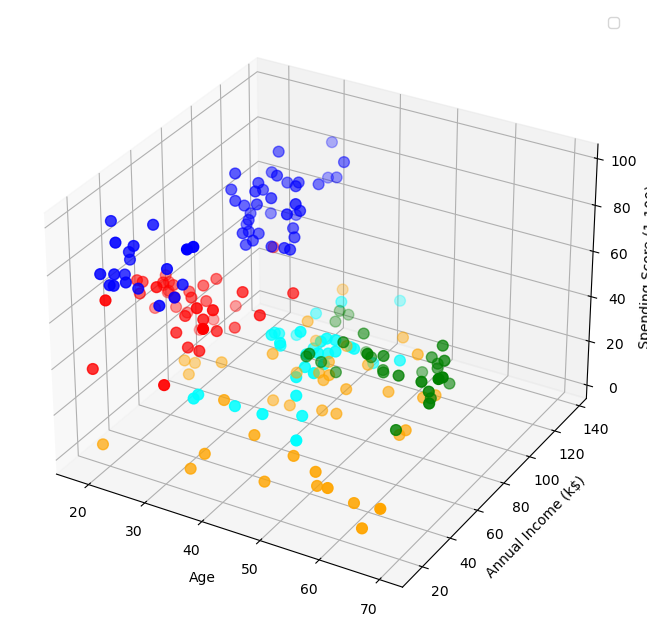

In [61]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[y == 0], df["Annual Income (k$)"][y == 0], df["Spending Score (1-100)"][y == 0], c='red', s=60)
ax.scatter(df.Age[y == 1], df["Annual Income (k$)"][y == 1], df["Spending Score (1-100)"][y == 1], c='blue', s=60)
ax.scatter(df.Age[y == 2], df["Annual Income (k$)"][y == 2], df["Spending Score (1-100)"][y == 2], c='green', s=60)
ax.scatter(df.Age[y == 3], df["Annual Income (k$)"][y == 3], df["Spending Score (1-100)"][y == 3], c='orange', s=60)
ax.scatter(df.Age[y == 4], df["Annual Income (k$)"][y == 4], df["Spending Score (1-100)"][y == 4], c='cyan', s=60)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()